## Анализ развлекательного приложения Procrastinate Pro+

### Описание проекта

Проанализтровать приложения `Procrastinate Pro+`. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

### Описание данных
В вашем распоряжении три датасета.

1. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, 
    - Структура `visits_info_short.csv`:
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

1. `orders_info_short.csv` — информацию о заказах
    - Структура `orders_info_short.csv`:
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

1. `costs_info_short.csv` — информацию о расходах на рекламу.
    - труктура costs_info_short.csv:
* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.

**Цели иследования**:


**Основные этапы работы**:
* загрузка и предобработка данных, подготовка данных к анализу
* Задать функции для расчёта и анализа `LTV`, `ROI`, `удержания` и `конверсии`.
* Исследовательский анализ данных
    - Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
    - Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
    - Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
    - Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
*  Маркетинг
    - Посчитайте общую сумму расходов на маркетинг.
    - Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
    - Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
    - Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.
* Оцените окупаемость рекламы 
* Вывести вывод на основании анлиза данных. Выделите причины неэффективности привлечения пользователей привести примеры некоректности в данных. Сформулируйте рекомендации для отдела маркетинга.

## Загрузка данных и подготовка их к анализу


Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.


Импортирование пакетов, настройка для dataframe и чтение файла

In [68]:
%matplotlib inline

import os
from dotenv import load_dotenv, find_dotenv
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

In [69]:
# установка переменой окружения
load_dotenv(find_dotenv())
host = os.getenv("HOST")

# Пути до файлов
profiles_path = '/datasets/visits_info_short.csv'
purchases_path = '/datasets/orders_info_short.csv'
marketing_path = '/datasets/costs_info_short.csv'

# Загрузка наборов данных
try:
    visits = pd.read_csv('.' + profiles_path) # журнал визитов
except:
    visits = pd.read_csv(host + profiles_path)

try:
    orders = pd.read_csv('.' + purchases_path) # покупки
except:
    orders = pd.read_csv(host + purchases_path)
    
try:
    costs = pd.read_csv('.' + marketing_path) # траты на рекламу
except:
    costs = pd.read_csv(host + marketing_path)

In [70]:
print(f'Набор данных имеет {visits.shape[0]} строк и {visits.shape[1]} колонок' )

# Посмотрим 5 строк набора данных
display(visits.head())

# Изучим информацию об типах набора данных
visits.info()

# распределение данных в таблице
visits.describe(include='object')


Набор данных имеет 309901 строк и 6 колонок


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,Region,Device,Channel,Session Start,Session End
count,309901,309901,309901,309901,309901
unique,4,4,11,306813,306793
top,United States,iPhone,organic,2019-06-27 14:56:41,2019-07-16 02:23:30
freq,207327,112603,107760,3,3


В наборе данных:
- нету ячеек с отсутствующими данными
- 11 уникальных каналов привлечения пользователей, как то многовато
- привести колонки единому стилю именования

In [71]:
print(f'Набор данных имеет {orders.shape[0]} строк и {orders.shape[1]} колонок' )

# Посмотрим 5 строк набора данных
display(orders.head())

# Изучим информацию об типах набора данных
orders.info()

orders['Revenue'].describe()

Набор данных имеет 40212 строк и 3 колонок


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64

In [72]:
print(f'Набор данных имеет {costs.shape[0]} строк и {costs.shape[1]} колонок' )

# Посмотрим 5 строк набора данных
display(costs.head())

# Изучим информацию об типах набора данных
costs.info()

costs.costs.describe()

Набор данных имеет 1800 строк и 3 колонок


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

В наборе данных:
- нету ячеек с отсутствующими данными
- колонки с датой привести к типу данных *date*
- привести колонки единому стилю именования

### Предобработка данных

- Приведение к нижнему регистру и заменим пробелы подчеркиванием во всех таблицах

In [73]:
visits.columns = visits.columns.str.lower().str.replace(' ','_')

orders.columns = orders.columns.str.lower().str.replace(' ','_')

costs.columns = costs.columns.str.lower()

- Приобразование данных о времени

In [74]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [75]:
min_date_prof = visits['session_start'].min()
max_date_prof = visits['session_start'].max()

num_days = (max_date_prof - min_date_prof).days

num_days

183

Посмотрим ны даты в данных, убедимся что даты соответствуют заявленным в ТЗ

In [76]:
visits['session_start'].describe()

count                  309901
unique                 306813
top       2019-06-27 14:56:41
freq                        3
first     2019-05-01 00:00:41
last      2019-10-31 23:59:23
Name: session_start, dtype: object

In [77]:
visits['session_end'].describe()

count                  309901
unique                 306793
top       2019-07-16 02:23:30
freq                        3
first     2019-05-01 00:07:06
last      2019-11-01 01:38:46
Name: session_end, dtype: object

In [78]:
# Проверим что нету что окончание сессии не имеет значений раньше по времени чем начало сессии
count_bad_sessions_raw = visits.query('session_start > session_end')
print(count_bad_sessions_raw)

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []


In [79]:
orders['event_dt'].describe()

count                   40212
unique                  40163
top       2019-10-26 06:49:22
freq                        2
first     2019-05-01 00:28:11
last      2019-10-31 23:56:56
Name: event_dt, dtype: object

In [80]:
print(
    'Начало набора рекламных затрат: ', costs['dt'].min(),
    '\nКонец набора рекламных затрат: ', costs['dt'].max()
)

Начало набора рекламных затрат:  2019-05-01 
Конец набора рекламных затрат:  2019-10-27


- Проверю что все каналы привлечения пользователей уникальны

In [81]:
visits.channel.unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Все каналы привлечения пользователей уникальны, дубликатов нет.

- Проверка на дубликаты

In [82]:
visits.duplicated().sum()

0

In [83]:
orders.duplicated().sum()

0

In [84]:
costs.duplicated().sum()

0

### Выводы

Наборы данных сильных изменений не потребовали. 
* Привели названия колонок к общему виду.
* Проверили на уникальность значений каналов в колонках
* Преобразовали колонки с типом времени, также нету некорректных данных по временному интервалу

## Задать функции для расчёта и анализа *LTV*, *ROI*, *удержания* и *конверсии*.

 **Подготовка**

Определим некоторые функции

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_ltv()` — для подсчёта LTV,
- `get_conversion()` — для подсчёта конверсии,
- `get_retention()` — для подсчёта Retention Rate.

### `get_profiles()`

In [85]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для колоритного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
#     for event in event_names:
#         if event in events['event_name'].unique():
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### `get-ltv()`

In [86]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### `get_conversion()`

In [87]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### `get_retention()`

In [88]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi()` — для визуализации LTV и ROI.

### `filter_data()`

In [89]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### `plot_retention()`

In [90]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### `plot_conversion()`

In [91]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### `plot_ltv_roi()`

In [92]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Вывод:
Была проведена подготовка к проведению полноценного анализа    

## Исследовательский анализ данных

Получим профили пользователей. Передадим в функцию `get_profiles()` данные о посещениях, покупках и трат на рекламу.

In [93]:
profiles = get_profiles(visits, orders, costs)

display(profiles.head())

,user_id,first_ts,channel,device,region,dt,week,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,19,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,28,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,40,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,34,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,40,2019-10-01,False,0.230769


In [94]:
# Задаем минимальную дату привлечения пользователя
min_analysis_date = profiles['dt'].min() 
print(f'Набор данных начинается с: {min_analysis_date}')

# Момент времени (максимальная дата в наборе данных)
observation_date = profiles['dt'].max()
print(f'Набор данных заканчивается: {observation_date}\n')
print(f'Итоговая продолжительность: {(observation_date - min_analysis_date).days} дней')
# 

Набор данных начинается с: 2019-05-01
Набор данных заканчивается: 2019-10-27

Итоговая продолжительность: 179 дней


Представленный набор данных соответсвует временному промежетку заявленному в тех. задании. Собраны данные за 179 дней.

### Анализ по странам
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [95]:
country_df = profiles.groupby('region').agg({'user_id':'nunique'}).rename(columns={'user_id':'count'})
country_df['payer'] = profiles.query('payer == True').groupby('region').agg({'user_id':'count'})
country_df['conversion'] = (country_df['payer'] / country_df['count'])

country_df.sort_values(by='conversion', ascending=False).style.format({'conversion':'{:.1%}'}).background_gradient('coolwarm')

,count,payer,conversion
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


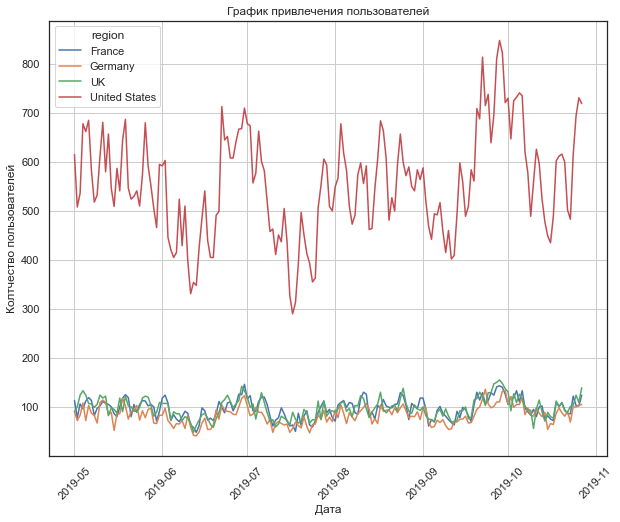

In [96]:
profiles.pivot_table(
    index='dt',
    columns='region',
    values='user_id',
    aggfunc='nunique').plot(figsize=(10, 8),grid=True);

plt.title('График привлечения пользователей')
plt.xlabel('Дата')
plt.ylabel('Колтчество пользователей')
plt.xticks(rotation=45)
plt.show()

**Вывод**
- На долю США приходиться львиная доля пользователей борющихся с прокрастинацией, больше всех остальных регионов вместе взятых
- В среднем в США привлекается в приложение - 600 пользователей, для остальных регионов 90 пользователей ежедневно
- В США также самый высокий процент покупающих пользователей - 7%, остальные регионы сильно уступают лидеру - 4% от общего количества привлеченных пользователей

### Анализ по гаджетам
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построю таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [97]:
device_df = profiles.groupby('device').agg({'user_id':'nunique'}).rename(columns={'user_id':'count'})
device_df['payer'] = profiles.query('payer == True').groupby('device').agg({'user_id':'count'})
device_df['conversion'] = (device_df['payer'] / device_df['count'])

device_df.sort_values(by='conversion', ascending=False).style.format({'conversion':'{:.1%}'}).background_gradient('coolwarm')

,count,payer,conversion
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


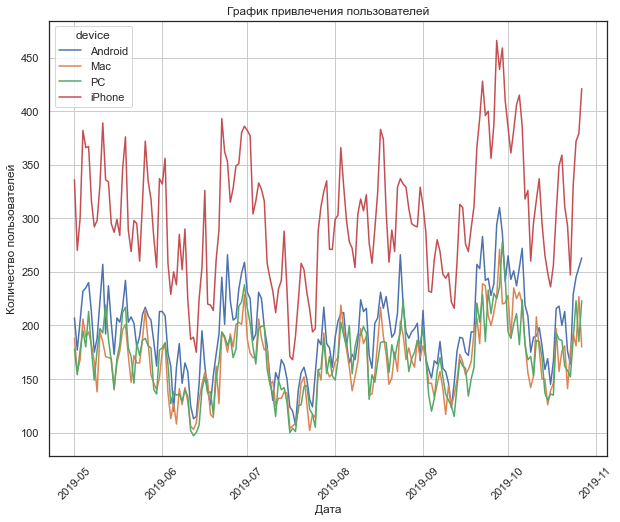

In [98]:
profiles.pivot_table(
    index='dt',
    columns='device',
    values='user_id',
    aggfunc='nunique').plot(figsize=(10, 8),grid=True);

plt.title('График привлечения пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

**Вывод**
- Если исходить из предыдущего графика, то в США любимые это платформы от производителя `Apple`, то и в этом графике видим лидеров `iPhone` в количественном отношении, `Mac` лидер в доле покупающих пользователей - 
- Чаще всего заходят в приложение с мобильных устройств, стационарные платформы уступают им.
- Доля покупающих пользователей, продукты, в приложении не сильно отличаются между собой у лидера `iPhone'` - 6.4%, у аутсайдера `PC` - 5.0%  к общему количеству пользователей данных платформ
- `iPhone` лидер по привлечению новых пользователей, остальные платформы уступают ему в 2 раза

### Анализ по каналам привлечения
- Просмотрим рекламные источники привлечения и определю каналы, из которых пришло больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [99]:
channel_df = profiles.groupby('channel').agg({'user_id':'nunique'}).rename(columns={'user_id':'count'})
channel_df['payer'] = profiles.query('payer == True').groupby('channel').agg({'user_id':'count'})
channel_df['conversion'] = (channel_df['payer'] / channel_df['count'])

channel_df.sort_values(by='conversion', ascending=False).style.format({'conversion':'{:.1%}'}).background_gradient('coolwarm')

,count,payer,conversion
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


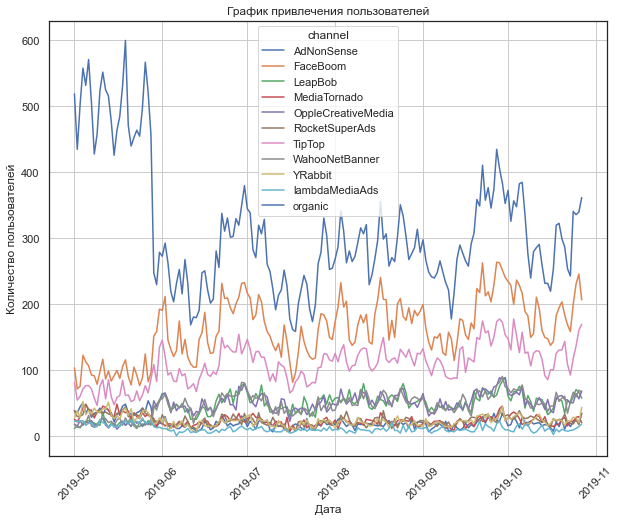

In [100]:
profiles.pivot_table(
    index='dt',
    columns='channel',
    values='user_id',
    aggfunc='nunique').plot(figsize=(10, 8),grid=True);

plt.title('График привлечения пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
plt.show()

**Вывод**
- Больше всего привлекает по количеству `organic` 59тыс, но он также является аутсайдером по доле покупающих пользователей всего 2% от общего количества привлеченных пользователей
- На втором месте по количеству `FaceBoom` 29тыс, он является лидером с долей в 12% покупающих пользователей
- 3ее и 4ое места занимают `AdNonSense`, `lambdaMediaAds` у которых количество привлеченных пользователей в разы меньше чем у лидеров, но зато доли в 11% и 10% соответственно от общего пользователей с этих платформ привлечения впечатляют, по отношению к другим участникам данного рейтинга.
- В мае месяце были высокие показатели регистраций с платформы `organic`, но в конце мая происходит резкий спад регистрации пользователей на данной платформе, и в тот же момент (конец мая) вырастает показатель новых пользователей  с  платформ `FaceBoom`, `TipTop`

### Выводы
В данном блоке мы рассмотрели базовые значения конверсии пользователей в покупатели по регионам, устройствам и каналам привлечений, где был найден основной рынок использования приложения:

1. Регион США впереди планеты всей, вместе взятой. С этого региона приходит больше всего пользователей и лучше всего конвертируются в покупателей по сравнению с другими регионами.
1. Больше всего приходят пользоваться с канала привлечения `organic`, но там доля покупающих особенно мала.
1. Необходимо присмотреться к каналам привлечения `AdNonSense`, `lambdaMediaAds` с которых приходят немного по количеству, но доля пользующихся продуктами высока, по отношению к другим каналам рейтинга.
1. Наибольшую конверсию приносят пользователи с устройств`Mac`, затем идут пользователи `iPhone`, то есть можно сказать что в целом пользователи имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay
1. Большая часть пользователей заходит в приложение с мобильных устройств.

## Маркетинг

- Просмотрим общий срез по платежам за рекламу. Посчитаем общую сумму расходов на маркетинг.

In [101]:
costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [102]:
print(f'Расходы на маркетинг: {round(costs.costs.sum())}$')

Расходы на маркетинг: 105497$


Узнаем, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [103]:
(costs.groupby('channel')
 .agg({'costs':['sum', 'median', 'nunique']})
 .sort_values(by=('costs','sum'), ascending=False)
 .style.background_gradient('coolwarm'))

`TipTop`, `FaceBoom` - составляют 85% всех рекламных расходов

### Визуализация расходов на маркетинг 

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

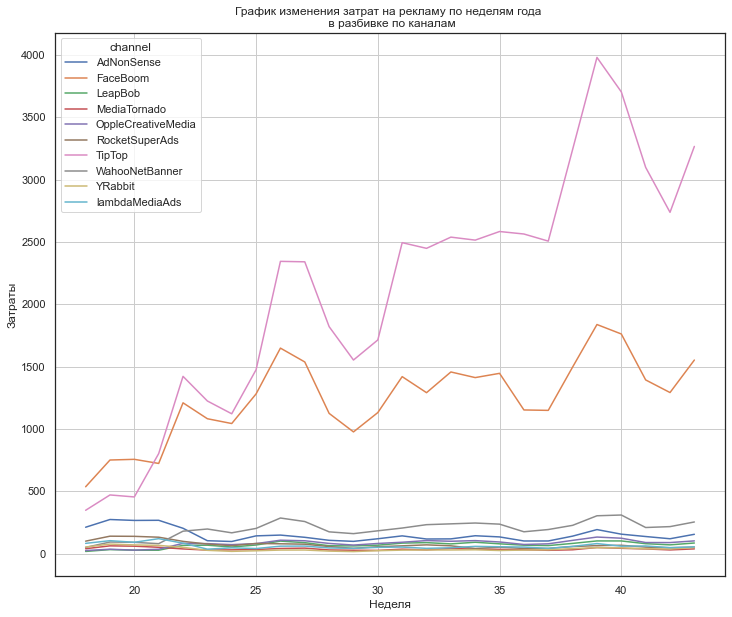

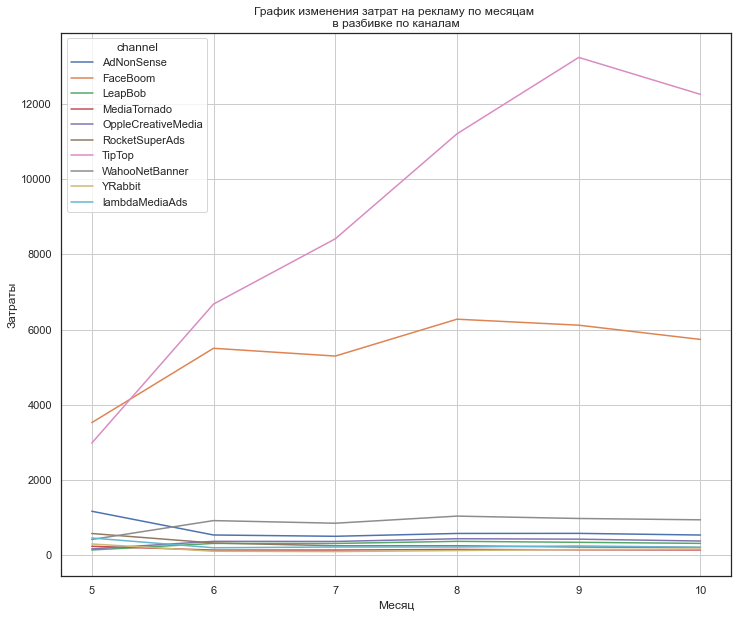

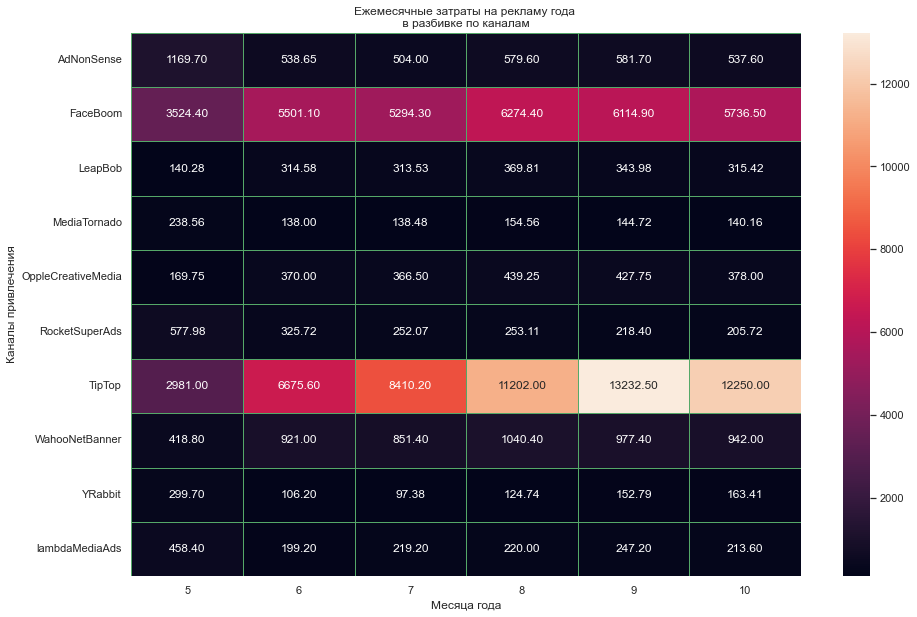

In [104]:
# добавим в набор колонки с неделей и месяцем года
df = costs
df['week'] = pd.to_datetime(df['dt']).dt.isocalendar().week
df['month'] = pd.to_datetime(df['dt']).dt.month

#  график по недельным тратам на рекламу
filtered_data = df.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True)

plt.title('График изменения затрат на рекламу по неделям года \n в разбивке по каналам')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()


#  график по недельным тратам на рекламу
filtered_data = df.pivot_table(
        index='month', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10),
           grid=True,)

plt.title('График изменения затрат на рекламу по месяцам \n в разбивке по каналам ')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()


# Хеатмап по ежемесячным тратам на рекламу
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Ежемесячные затраты на рекламу года \n в разбивке по каналам ')
(
    sns.heatmap(
    df.pivot_table(
        index='channel',
        columns='month',
        values='costs',
        aggfunc='sum'), annot=True, fmt='.2f', linewidths=1, linecolor='g')
)
plt.xlabel('Месяца года')
plt.ylabel('Каналы привлечения')
plt.show()

**Подитог:**   
    Лидеры по финансовой нагрузке по привлечению `'TipTop'` и `'FaceBoom'`:  
- с июня месяца увеличились суммы по затратам на рекламу в 2 раза и с последующим ежемесячным ростом затрат
- у `'TipTop'` есть прирост в июне месяце по привлечению пользователей, но последующие месяцы это количество по привлечению так сильно не растет как затраты на рекламу, и остается в среднем на одном уровне
- Возможно повышение тарифов рекламы или технические неисправности

### Расчет`CAC`
Узнаем сколько в среднем стоило привлечение одного пользователя (`CAC`) из каждого источника. Для этого воспользуемся профилями пользователей.

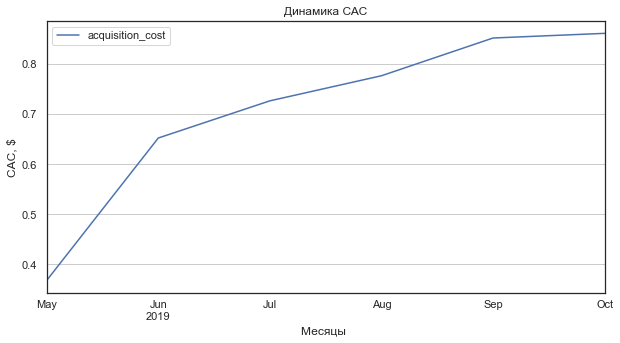

In [105]:
# строим график истории изменений CAC по всей выборке

cac = profiles.pivot_table(
    index='month', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Месяцы ')
plt.title('Динамика САС')
plt.show()

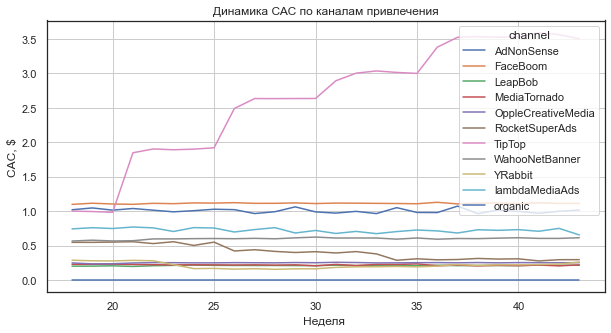

In [106]:
# строим график истории изменений CAC по каналам привлечения

cac = profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Неделя ')
plt.title('Динамика САС по каналам привлечения')
plt.show()

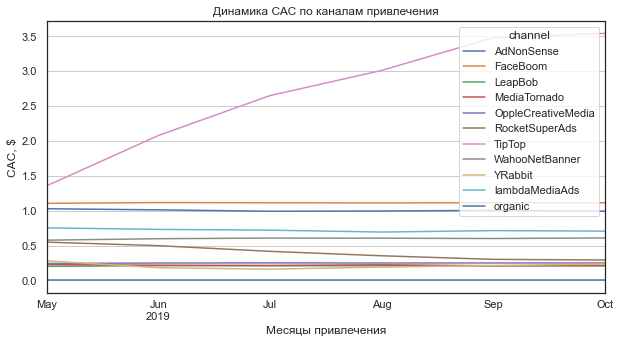

In [107]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Месяцы привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [108]:
(
    profiles.groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost':'avg_cost'})
    .style.format({'avg_cost':'{:.2f} $'}).background_gradient('coolwarm'))


,avg_cost
channel,
TipTop,2.80 $
FaceBoom,1.11 $
AdNonSense,1.01 $
lambdaMediaAds,0.72 $
WahooNetBanner,0.60 $
RocketSuperAds,0.41 $
OppleCreativeMedia,0.25 $
YRabbit,0.22 $
MediaTornado,0.22 $


Здесь мы можем четко увидеть:  

   - `'TipTop'` трехкратное увилечение по тратам привлечения одного пользвотеля с `1.2$` до `3.6$` в течение 6 месяцев, или в среднем это обходиться в `2.8$`  компании
   - остальные каналы остаются в одной динамике по тратам на привлечения пользователей.
   - `FaceBoom`, `AdNonSense` траты на одного пользователя чуть больше `1$`
   - Оставшиеся 7 каналов по расходам на 1 пользователя меньше `0.72$`
   - Затраты на  `FaceBoom`, `AdNonSense`, `lambdaMediaAds` вместе взятые равны по затратам с `TipTop` по привлечению одного пользователя, слишком большие финансовые издержки

## Оценка окупаемости рекламы

**Задача:**  
Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. Подразумевается, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

**Этапы работы:**   
- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [109]:
# момент анализа
observation_date = datetime(2019, 10, 1).date()

# горизонт анализа
horizon_days = 14

# убираем из набора `organic` - поскольку канал с органическим трафиком
profiles = profiles.query('channel != "organic"')

### Общий анализ 

Для начала оценим общую ситуацию - посмотрим на окупаемость рекламы. Рассчитаем и визуализируем `LTV`,  `ROI`

In [110]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

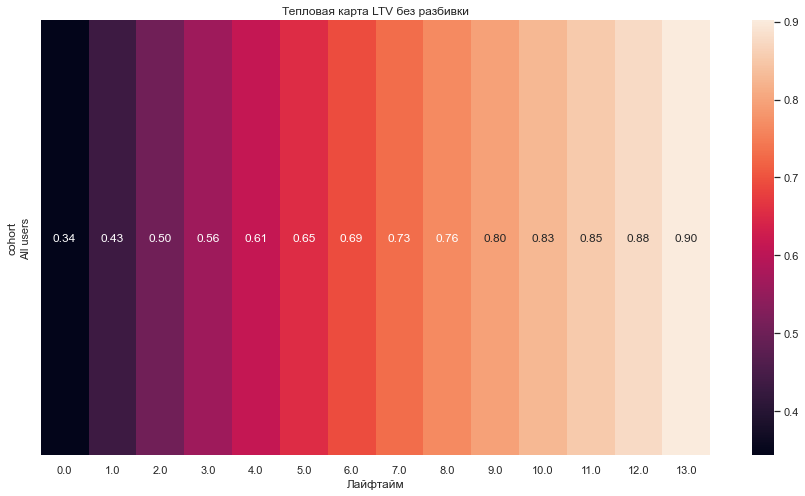

In [111]:
plt.figure(figsize = (15,8))
        
sns.heatmap(ltv_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

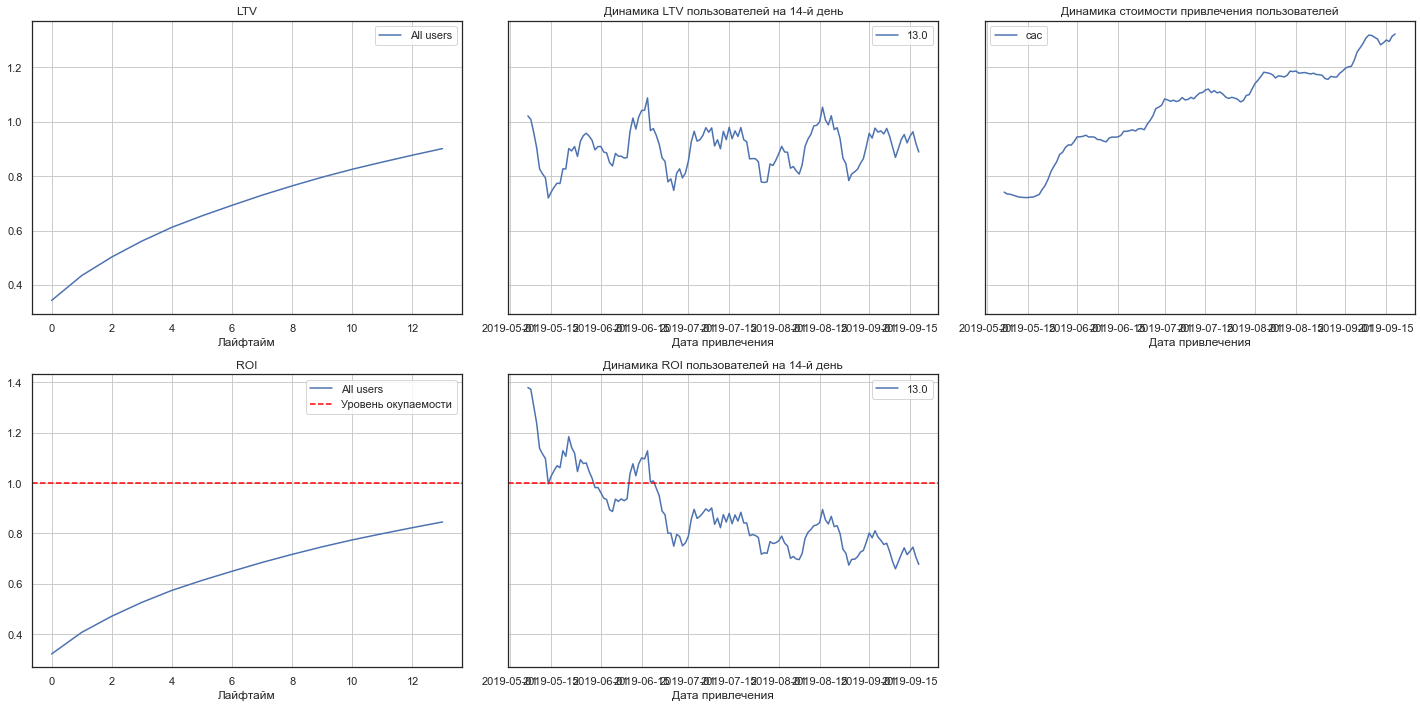

In [112]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать выводы:
- Жизненая ценность клиента на 14-ый день лайфтайма составляет `0.90$`
- Динамика ценности клиента имеет цикличность с пиками и падением ценности, возможно связано с проводимыми рекламными акциями
- Динамика стоимости привлечения ползователей растет на всем временном промежутке
- Реклама не окупается. `ROI` в конце 2 недели достигает показателя в `84%`
- С конца мая снижается `ROI` (окупаемость инвестиций) и с того же момента не уклонно растет `CAC` (стоимость привлечения пользователя)


#### Conversion Rate и Retention Rate покупателей
Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

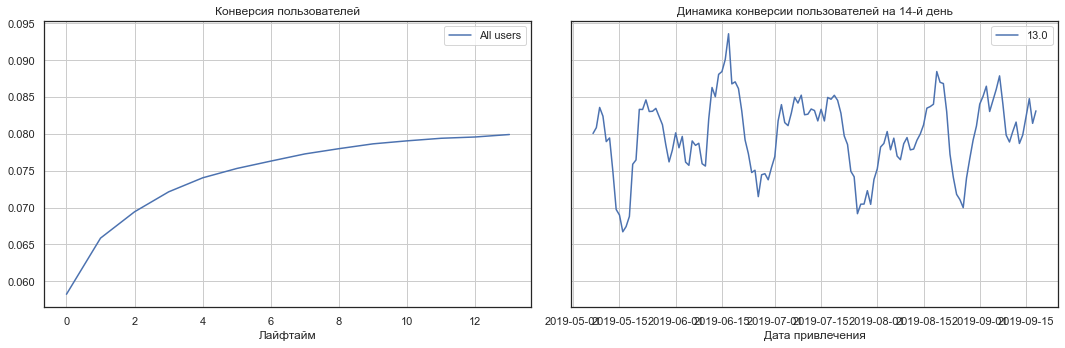

In [113]:
# считаем Conversion Rate
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_conversion(conversion, conversion_history, horizon_days)

- Конверсия пользователей на 14-ый день составляет 80%, результат хороший
- Общая динамика показывает что, самая низкая конверсия пользователей была в мае. После этого падения, с июня месяца наблюдаются резкий активности пользователей до июля месяца. Есть рост активности и спады у новых пользователей, но не было больше таких низких показателей по `CR'
- Программой активно пользуются новые пользователи и пользуются продуктами этого приложения

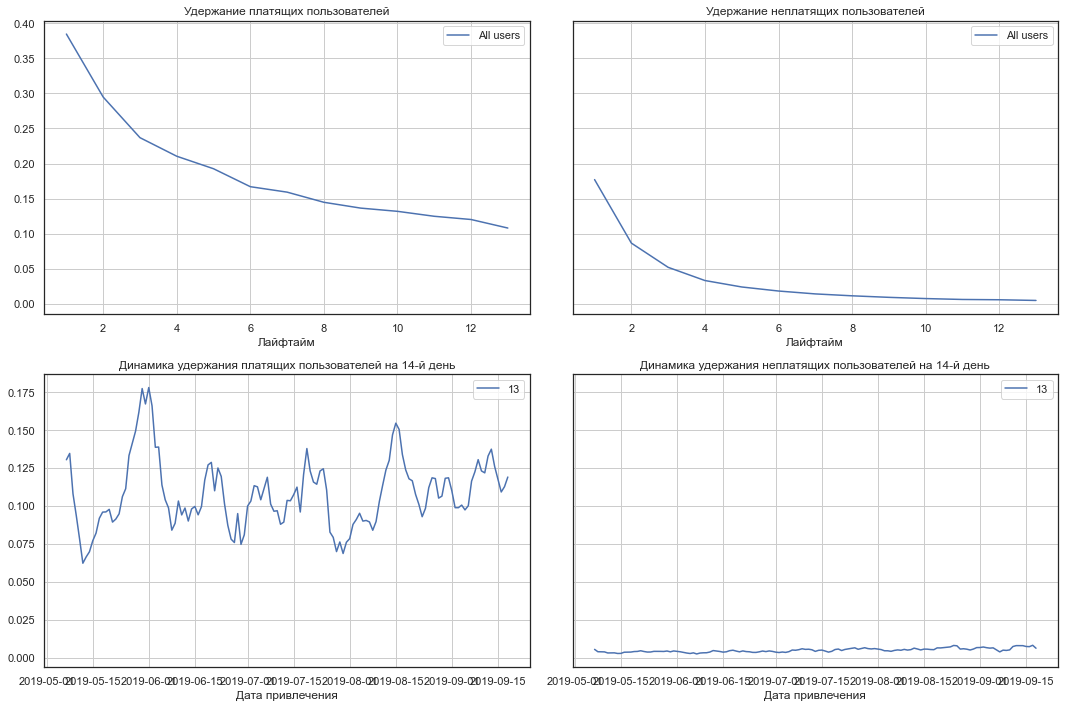

In [114]:
# строим график удержания 
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days)

plot_retention(retention, retention_history, horizon_days)


- Согласно графику платящих клиентов при окончании 2ой недели использования приложения остается 11% клиентов. Не платящих за продукты приложения на тот же самый момент остается минимальной количество - 1% от количества зарегистрировавшихся пользователей в первый день.
- По динамике удержания платежеспособных клиентов за период с мая по сентябрь колебания составили с 6% до 17.5%%, самый высокий показатель наблюдался в Июне
- У не платежеспособных динамика на 14 день зa весь период была на одном (низком) уровне.

#### **Выводы:**
- При рассмотрении общих данных реклама не окупается
- Наблюдается резкая возросшая динамика затрат на рекламу, в следствии чего пропорционально снижается окупаемость рекламы для привлечения новых пользователей
- Конвертирование пользователей в платящих составляет 14-ый день лайфтайма 80%, что показывает хорошую конвертируемость пользователей в покупателей 
- Динамика удержания в среднем за весь период на одном уровне, без сильных скачков в меньшую или большую сторону

### Анализ окупаемости рекламы по устройствам
Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [115]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

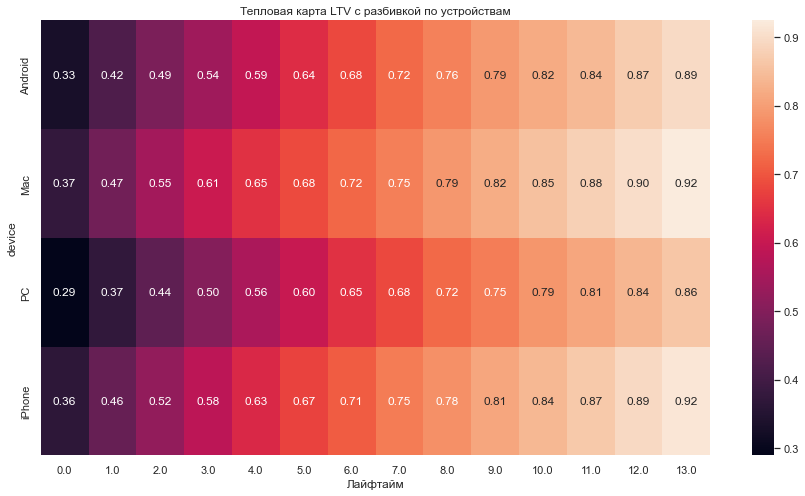

In [116]:
plt.figure(figsize = (15,8))
        
sns.heatmap(ltv_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV с разбивкой по устройствам')
plt.xlabel('Лайфтайм')
plt.show()

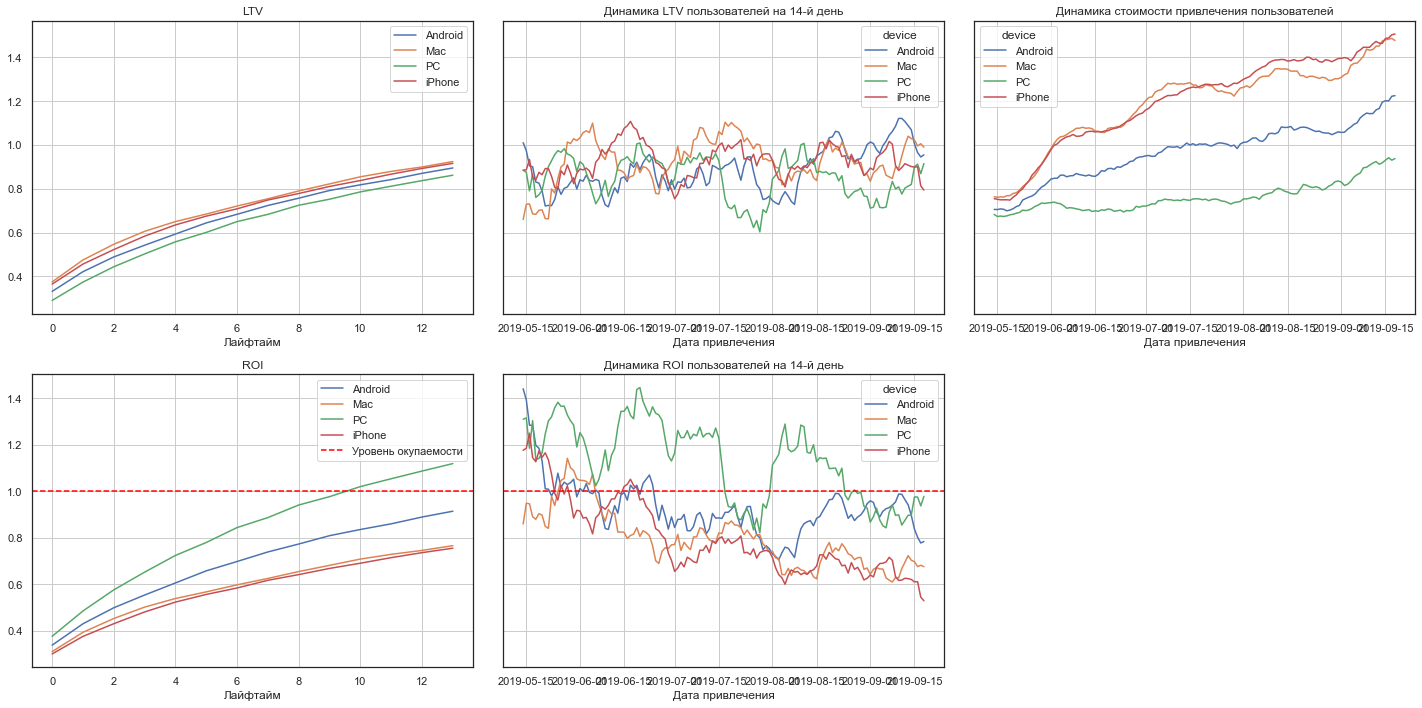

In [117]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать выводы:
- Жизненная ценность клиентов на всех устройствах, не сильно отличается от друга друга. И жизненная ценность клиентов составляет по устройсвам в среднем `0.90$`
- Динамика стоимости привлечения пользователей растет с мая по ноябрь. Сильнее всего динамика по привлечению пользователей с устройссв `iPhone`, `Mac`
- На 14ый день для пользователей устройств `PC` рекламные затраты окупаются, а вот пользователи продукции `Apple` и `Android` нет
- С мая месяца окупаемость рекламы в разбивке по устройствам не уклонно падает, и к ноябрю месяцу ни на одном устройстве не окупаются затраты на рекламу

#### `Conversion Rate` и `Retention Rate` покупателей в разрезе устройств
Проверим более детально конверсию пользователей и показатель удержания пользователей в контексте используемых устройств

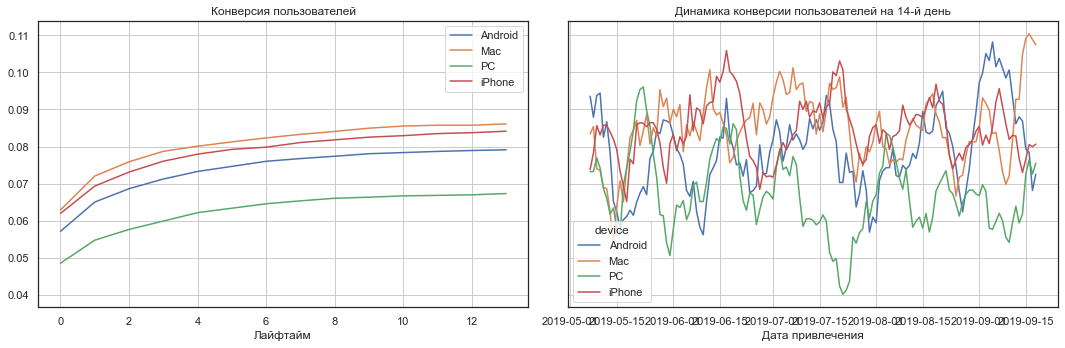

In [118]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion, conversion_history, horizon_days)

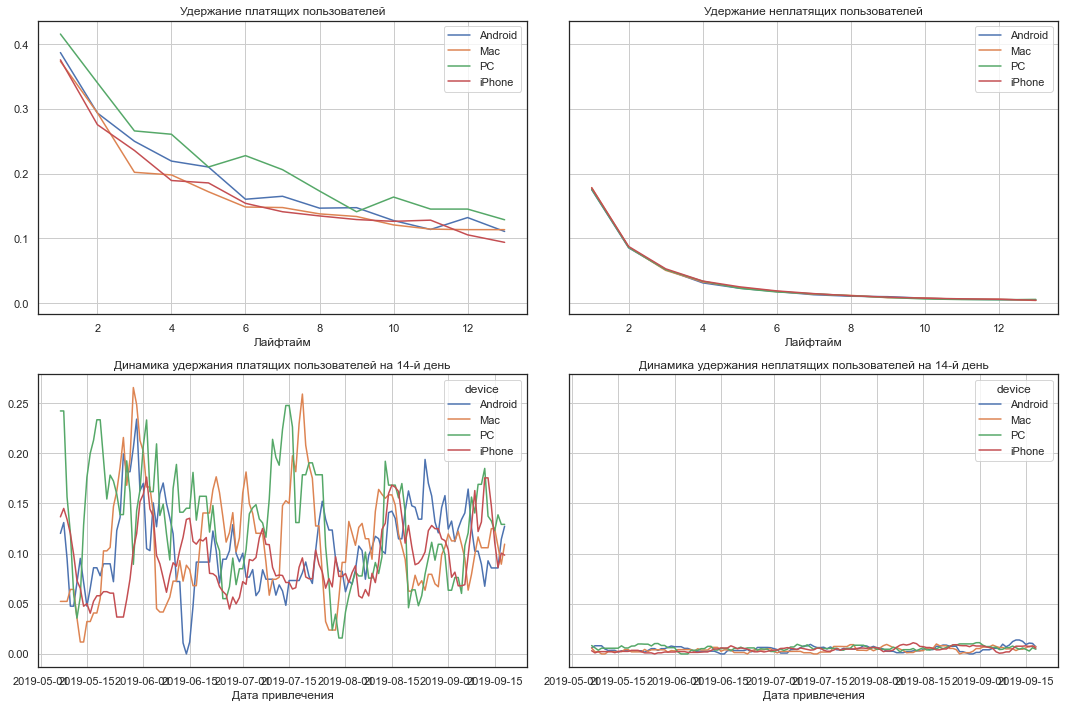

In [119]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention, retention_history, horizon_days)

- По конвертированию пользователей лучше `Mac`, затем `iPhone`, продукция компании `Apple`, замыкает тройку лидеров платформы на `Android`, с большим отставанием от них пользователи `PC`. В августе-сентябре по динамике конвертирования на 14 день наблюдаются пиковые показатели у платформ `Mac` и `Android`
- По удержанию пользователей и по динамике удержания платящих пользователей на 14-ый день в последние 2 месяца выборки данных выбросов значений нету, в среднем у всех устройств показатели одинаковы.

#### **Выводы:**
- Затраты на рекламу окупается привлеченных пользователей с устройств `PC`, динамика затрат на эти платфоры есть, но не такая высокая как у `Mac` и `iPhone`. Но по динамике окупаемости в конце выборки ни наодной платформе не окупаются затраты на рекламу.
- По конвертированию пользователей в платящих в разрезе устройств и динамике удержания их, данные сильно не отличаются. Показывают средний показетель.
- Стоит присмотреться к пользователям с устройствами `Mac`, `iPhone` и более детально разобраться в увеличении затрат на рекламу на них

### Анализ окупаемости рекламы по странам

In [120]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

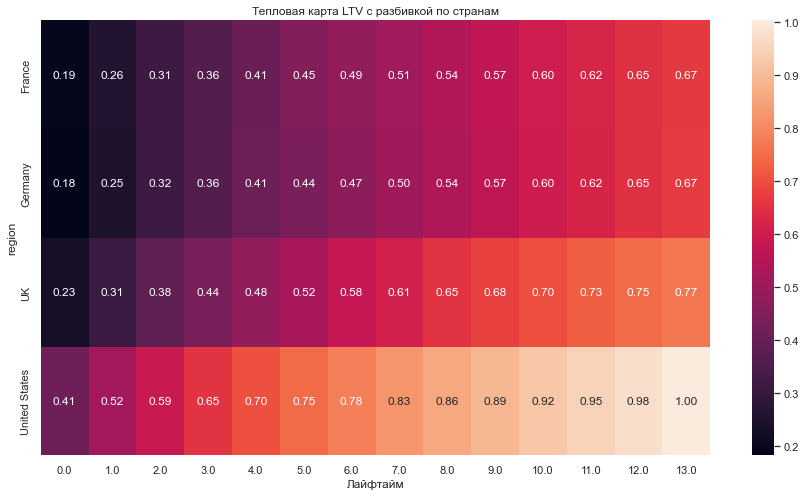

In [121]:
plt.figure(figsize = (15,8))
        
sns.heatmap(ltv_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV с разбивкой по странам')
plt.xlabel('Лайфтайм')
plt.show()

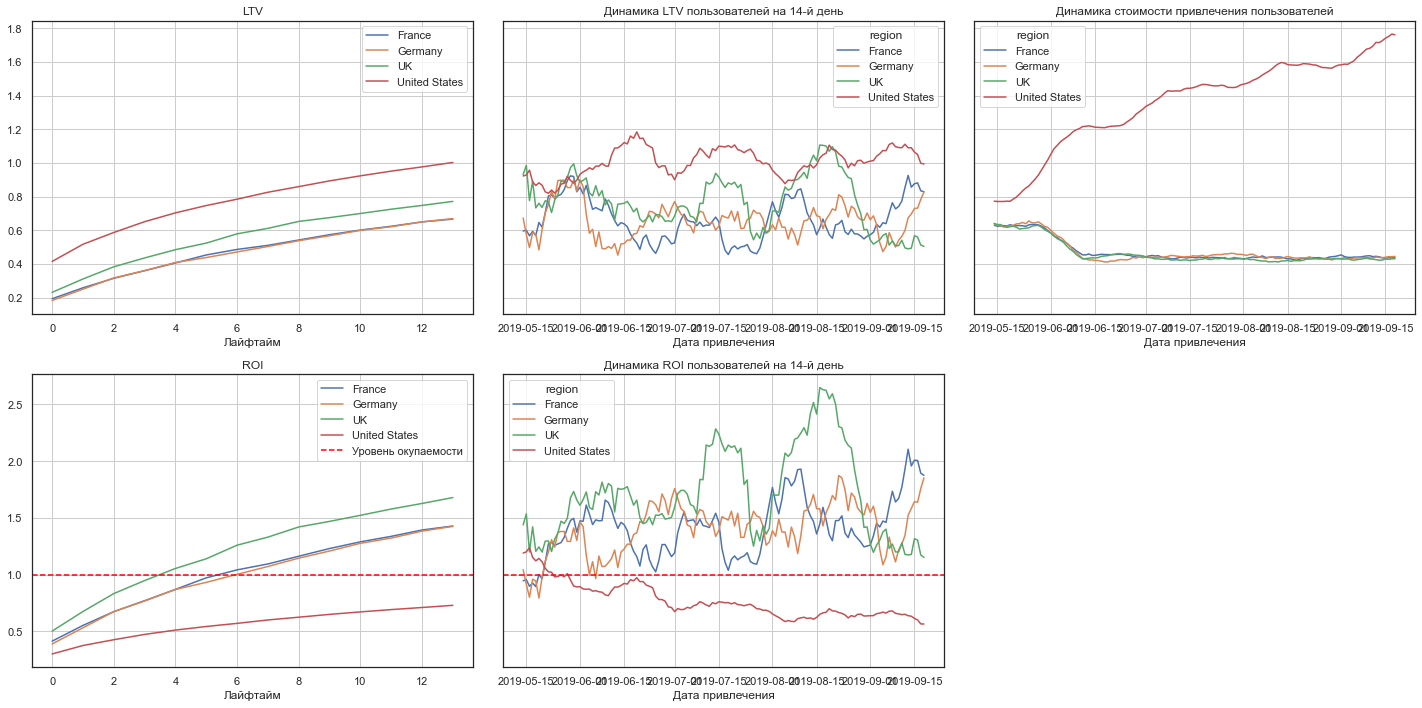

In [122]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

 По графикам можно сделать выводы:
- Жизненная ценность клиентов Европейской части в первый день начинается на одном уровне `0.20$`, Америка опережает в этот день в 2 раза по этому показателю `0.40$`, с постепенным равномерным увеличением к 14 дню во всех регионах
- С мая месяца динамика привлечения пользователей неуклонно растет в США, во всех остальных регинах в июне снизилась и находится на  этом одном уровне
- Реклама не окупается только в США, и составляет показатель `ROI` - 60%, так в других регинах этот показатель равен 150% 
- Окупаемость пользователей США, неуклонно падает. Возможно есть связь с низкими финансовыми показателями приложения из-за США.

#### Conversion Rate и Retention Rate покупателей в разрезе стран
Проверим более детально конверсию пользователей и показатель удержания в разрезе регионов местонахождения новых пользователей

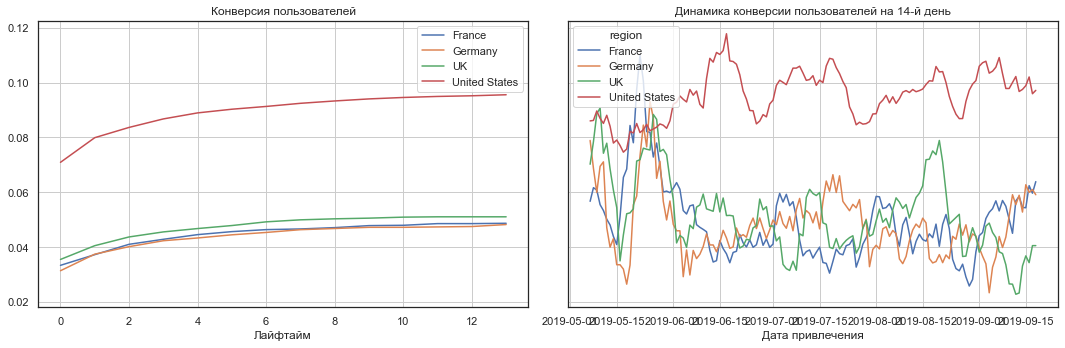

In [123]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion, conversion_history, horizon_days)

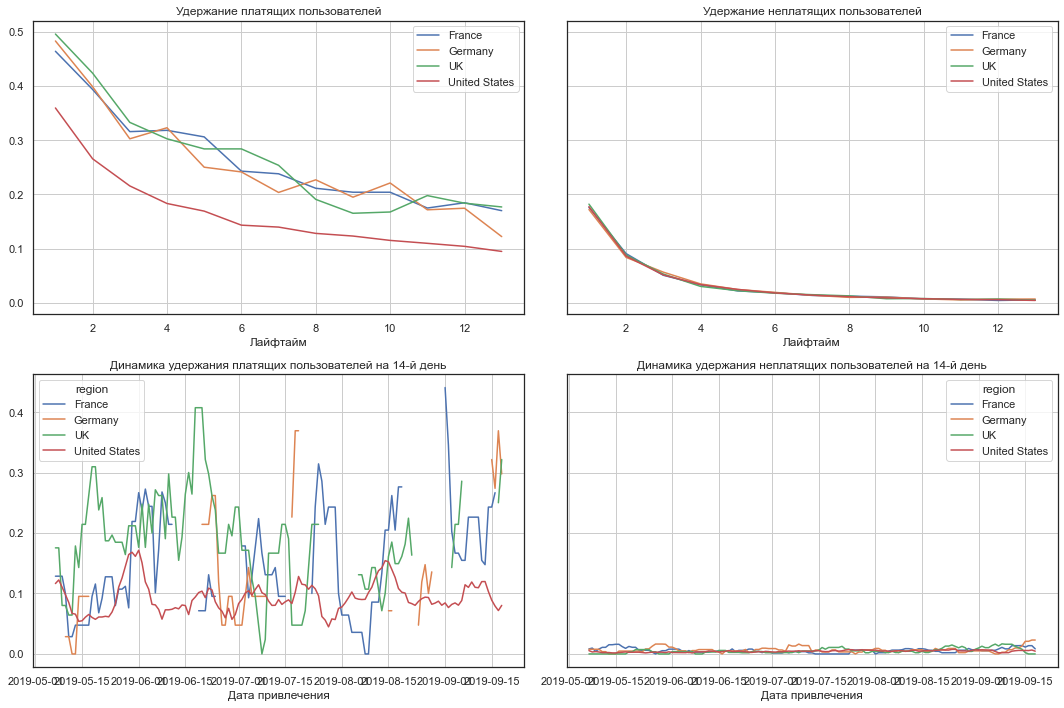

In [124]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention, retention_history, horizon_days)

- Очень высокая конверсия и динамика конверсии на 14-ый день в США, по сравнению с другими Европейскими регионами
- Но при этом удержание пользователей в США хуже с показателем 11% на 14ый день, и постоянным низким показателем по динамике удержания пользователей на 14-ый день на всем временном отрезке набора данных
- 3 Европейских региона в среднем на всех графиках и по всем показателям показывают одинаковые результаты

#### **Выводы:**
- Затраты на рекламу окупаются во всех регионах, кроме США
- Для региона США в 3 раза возросла динамика стоимости привлечения пользователей, по сравнению с другими сравниваемыми регинами. Из-за чего снижается ежемесячно показатель окупаемости (ROI).  Конвертация пользователь и динамика конвертации высокая в США, но самый низкий показатель удержания пользователей в этом регионе. 
- Оставшиеся регионы показывают в среднем одинаковые хорошие показатели по всем параметрам.
- Возможно для региона США необходимо собрать более детально информацию, чтобы узнать из-за чего возникли высокие затраты по привлечению пользователей в последние месяцы, так как рост начался с конца мая и до конца времени выборки продолжается.

### Анализ окупаемости рекламы по каналам привлечения пользвателей

In [125]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

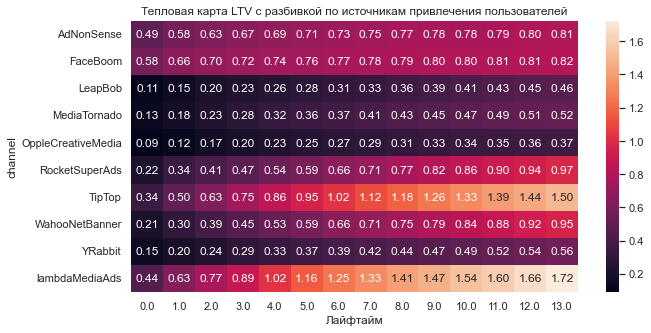

In [126]:
plt.figure(figsize = (10,5))
        
sns.heatmap(ltv_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f')
plt.title('Тепловая карта LTV с разбивкой по источникам привлечения пользователей')
plt.xlabel('Лайфтайм')
plt.show()

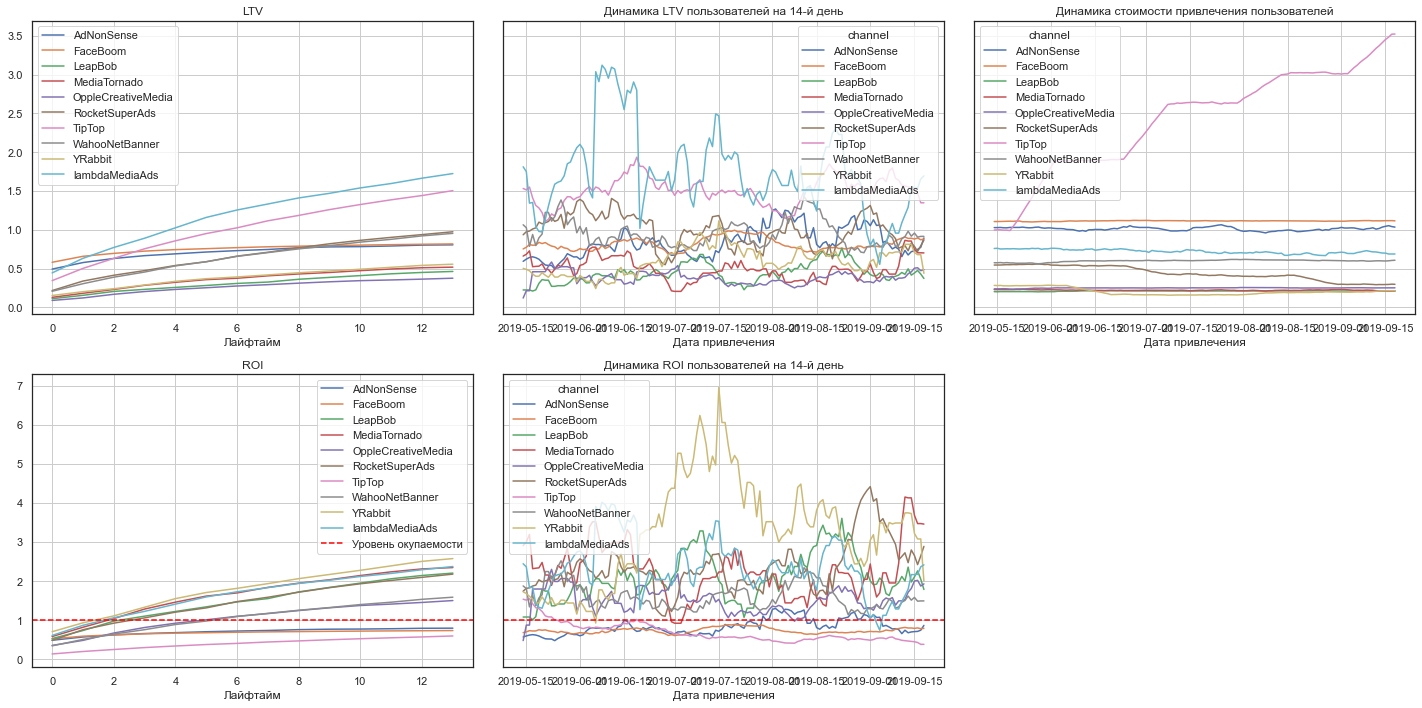

In [127]:
# смотрим окупаемость с разбивкой по источникам привлечения
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать выводы:
- Жизненная ценность клиентов, а значит больший прирост выручки, привлекают `lambdaMediaAds` и `TipTop` более `1.5$` на 14 день с привлечения нового клиента
- От месяца к месяцу увеличивается стоимость привлечения пользователей у `TipTop`, у остальных каналов привлечения стоимость не меняется и находиться на одном уровне
- Канал 'YRabbit' показывает блестящие результаты по динамике окупаемости на 14-день, с июня по август их показатели никто не мог превзойти. На всем промежутке времени у этого канала наблюдается понижение стоимости привлечения пользователей.
- Не окупаются затраты на рекламу с каналов `TipTop`, `AdNonSense`, `FaceBoom`, у них же самая низкая окупаемость на 14-ый день. Все остальные каналы по затратам окупаются 

#### Conversion Rate и Retention Rate покупателей в разрезе каналов привлечения
Проверим более детально конверсию пользоватетелей и показатель удержания пользователей в контексте каналов привлечения

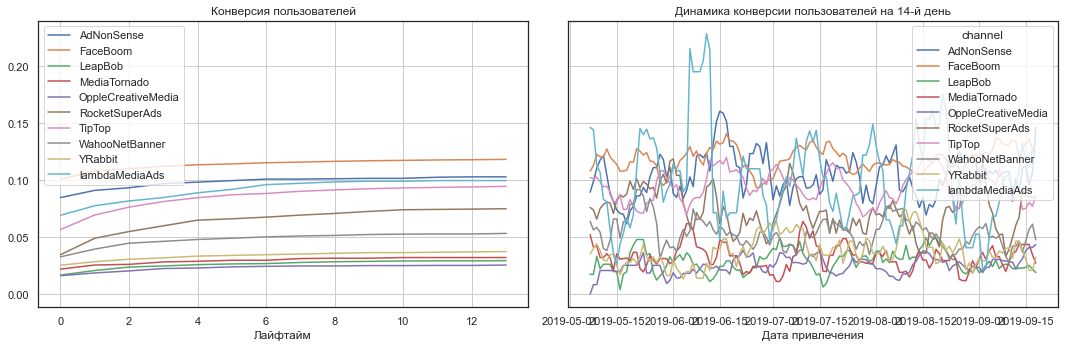

In [128]:
# считаем Conversion Rate
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

conversion
# строим графики
plot_conversion(conversion, conversion_history, horizon_days)

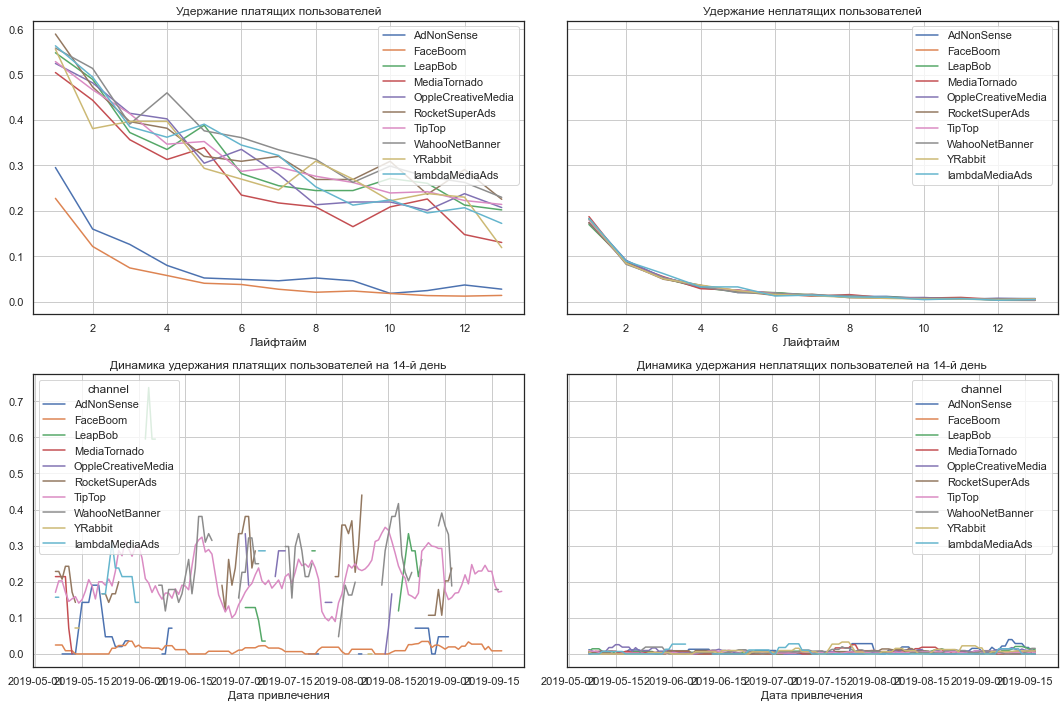

In [129]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

- `FaceBoom`, `AdNonSense` являются лидерами по показателю конвертирования пользователей в платящих, но они также являются анти лидерами с самыми худшими показателями по удержанию пользователей на 14-день среди всех остальных каналов.

#### **Выводы:**
- Затраты на рекламу не окупаются только у 3 каналов привлечения новых пользователей, `TipTop`, `AdNonSense`, `FaceBoom`. Остальные каналы привлечения оправдывают вложенные в них средства.
- У каналов - `FaceBoom`, `AdNonSense` высокая конверсия пользователей, но очень низкая динамика удержания на 14-ый пользователей, необходимо присмотреться более детально к рекламируемой информации этих каналов.
- Канал `lambdaMediaAds`является лидером по жизненой ценность  и хорошей динамикой ценности покупателя в периоде набора данных, средние затраты на рекламу по сравнению со всеми каналами. Что влечет за собой хорошие показатели по конвертации и динамике удержания пользователей.
- Канал `TipTop` по жизненной ценности клиентов, но он также является лидером по росту динамики затрат на рекламу, в 3 раза по сравнена с другими каналами, что приводит к самым низким результатам по окупаемости. Скорее всего этот канал главный виновный по финансовым затратам на рекламу.

## Выводы



**Причины неэфективности привлечения пользователей**

В целом эффективность привлечения новых пользователей, во всех рассмотренных категориях наблюдается, затраты на рекламу окупается в некоторых категориях. Только необходимо разобраться в некоторых спорных моментах, чтобы улучшить финансовые покатели в выручке приложения, на которые данный набор данных не может дать ответы.

**Рекомендации отделу маркетинга**  
Для того чтобы разобраться с причинами возросшего финансирования на рекламу стоит обратить внимание на:
- пользователей устройств `Mac` и `iPhone`, затраты привлечение пользователей с этих устройств не окупается, затраты на рекламу растут ежемесячно
- стоит обратить что основной рынок этих устройств находится в регионе США, в котором возросла динамика затрат по привлечению пользователей в 3 раза, что привело к низким показателям в регионе по окупаемости привлечения новых пользователей. Да регион привлекает самое большое количество пользователей для приложения, но количество привлеченных новых на конец набора данных не увеличился в 3 раза, а на протяжении всего набора в среднем был на одном уровне.
- стоит обратить на каналы:
    * `TipTop` - возможно главный виновный в финансовых потерях на рекламу. У этого канала возросла динамика затрат на рекламу в 3 раза. Этот канал является главным пожирателем бюджета на привлечение пользователей. В итоге затраты на рекламу не окупаются. Возможно имеются проблемы в сборе данных при переходе с канала привлечения или оплате продуктов приложения.
    * `FaceBoom` - также является лидером по увеличению динамики по затратам по  привлечению новых пользователей, да хорошая конверсия пользователей, но обладает самими низкими показателями по удержанию пользвателей на 14-день. Возможно стоит более детально рассмотреть данные о рекламации приложения. Затраты на рекламу не окупаются.
    * `AdNonSense` - так же как и у `FaceBoom`, у этого канала затраты на рекламу не окупаются. Высокая конверсия и низкая динамика удержания пользователей на 14-ый день.
    * Возможно в дальнейшем стоит отказаться от услуг  `FaceBoom`, `AdNonSense` по привлечению новых пользователей. 
    * `lambdaMediaAds` - показал себя в самом лучшем свете среди всех каналов привлечения. Со средними затратами по рекламе, у этого канала, лучшая жизненная ценность пользователя, в лидерах по конвертации и динамике удержания пользователей на 14-ый день. Возможно стоит проанализировать рекламации и акции с этого канала, что бы в дальнейшем распространить такой же успех на других каналах, которые показали средние результаты по метрикам.
    * `YRabbit` - показал наилучшую динамику ROI на 14 день, который не могли превзойти ни один из каналов. 2 с половиной месяца был лидером по этому показателю. На пике значения ближайший канал отставал от этого канала в 2 раза по `ROI`. Возможно это связано с тем что у данного канала на всем временном отрезке снижается динамика стоимости привлечения пользователей.
    * Возможно стоит рассмотреть при отказе от услуг `AdNonSense`, `FaceBoom` привлечение другие каналы привлечения. 